In [1]:
import sys
sys.path.append('../')
sys.path.append('../../..')
from config import COCO_CAPTIONS_PATH
from src.datasets.vqa import VQAv2
import matplotlib.pyplot as plt
plt.set_loglevel(level = 'warning')

DEBUG:matplotlib:matplotlib data path: /Users/timcares/miniforge3/envs/mmrl/lib/python3.9/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/Users/timcares/.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is darwin
DEBUG:matplotlib:CACHEDIR=/Users/timcares/.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /Users/timcares/.matplotlib/fontlist-v330.json


In [3]:
ds = VQAv2(data_path=COCO_CAPTIONS_PATH, split='train', num_max_bpe_tokens=512, transform_jitter=False,
           beit_transforms=False, no_transform=False, task=None, crop_scale=(0.6, 1.0))

Load 434867 image-text pairs from /Users/timcares/CompSci/Uni/Projects/MasterThesis/data/coco/vqa.train.jsonl. 
Load 204889 image-text pairs from /Users/timcares/CompSci/Uni/Projects/MasterThesis/data/coco/vqa.trainable_val.jsonl. 


In [4]:
print(ds)

Dataset VQAv2{
  Number of items: 639756,
  data root = /Users/timcares/CompSci/Uni/Projects/MasterThesis/data/coco/,
  split = train,
  dataset index files = ('vqa.train.jsonl', 'vqa.trainable_val.jsonl')
  num max bpe tokens = 512
  transforms = [
    Compose(
      ToImage()
      ToDtype(scale=True)
)
    Compose(
      RandomResizedCrop(size=(224, 224), scale=(0.6, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=3, antialias=True)
      RandomHorizontalFlip(p=0.5)
)
    Compose(
      ToDtype(scale=True)
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], inplace=False)
)
  ]
}


In [5]:
b = ds.collater([ds[i] for i in range(10)])

In [8]:
b['image'].shape

torch.Size([10, 3, 224, 224])

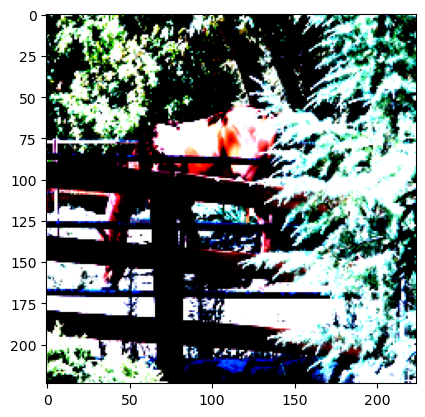

In [7]:
plt.imshow(b['image'][1].permute(1, 2, 0))